Final Project
DSC 530 
Author Carlos Cantu 
6/15/2023 

# Introduction

Analyzing stock data helps investors make informed decisions about buying, selling, or holding stocks. By examining historical price trends, financial statements, and other relevant data, investors can assess the potential risks and returns associated with a particular stock. Analyzing stocks allows investors to assess the risk associated with an investment. By examining factors such as volatility, beta, regression, and correlation, investors can determine the potential downside and upside of a stock.  By examining fundamental indicators such as earnings growth, revenue trends, and valuation ratios, investors can uncover undervalued or overvalued stocks. Technical analysis techniques can also be employed to identify price patterns and trends that can help predict future price movements. Considering the historical stock market performance and projected returns, investors can estimate future investment values, assess the feasibility of financial goals, and make appropriate adjustments to their investment strategies. The goal of this research is to identify company performance with the given data in order to suggest a recommendations of purchase for future gains. Analyzing stock data is important because it empowers investors with knowledge and insights to make informed decisions, manage risks, identify opportunities, monitor performance, understand market trends, as well as provide a  plan for the future.

# Approach 

The proposed approach for identifying the performing companies using the given data involves leveraging the power of the pandas library for data manipulation and preparation. First, the data will undergo essential tasks, such as cleaning, handling missing values, and organizing it into a suitable format for analysis. With the data prepared, the exploratory analysis will begin, using various statistical techniques to gain insights.

Descriptive statistics will be employed to understand the central tendencies and distributions of the stock datayC cumulative distribution functions (CDFs) will be employed to assess the likelihood of stock prices reaching specific values, providing further insight into stock performance.

The analysis will delve into statistical relationships between various variables to identify potential correlations and dependencies among them. Moreover, log-normal distributions will be explored to capture any potential asymmetric patterns in stock returns, which could impact investment decisions.

Furthermore, time series regression will be performed on individual stocks and on the collective stock data to predict future price movements based on historical trends. By utilizing time series analysis, the approach aims to project potential earnings and assess the performance of each stock over time.

By combining these diverse statistical techniques and considering both individual stock performance and collective market behavior, the approach offers a comprehensive evaluation of each company's potential earning performance. This data-driven approach seeks to provide valuable insights that will guide investors in making informed decisions and identifying the best-performing company in the stock market.

# The Data 

The data are  historical stock price data for Apple, Microsoft, Netflix and Google. 

In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
import statsmodels.api as sm


In [2]:
stocks = pd.read_csv( "C:/Users/cantu/OneDrive - Bellevue University/Documents/Data Science Masters/Data exploration and analysis DSC530/final project/data/stocks.csv")
stocks.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [3]:
stocks = stocks.rename(columns={'Adj Close': 'Adj_Close'})

In [4]:
# listing the variables
stocks.columns  

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close',
       'Volume'],
      dtype='object')

#### Ticker =  stock company  signifier 
#### Date = date of the data pulled 
#### Open = value of stock when market opened 
#### High = value of stock at its peak 
#### Low = lowest value of stock 
#### Close = value of stock at its close of market  
#### Adj_close = Adjusted closing price refers to the price of the stock after paying off the dividends 
#### Volume = the number of shares traded in a given period

# Histogram of Variables 

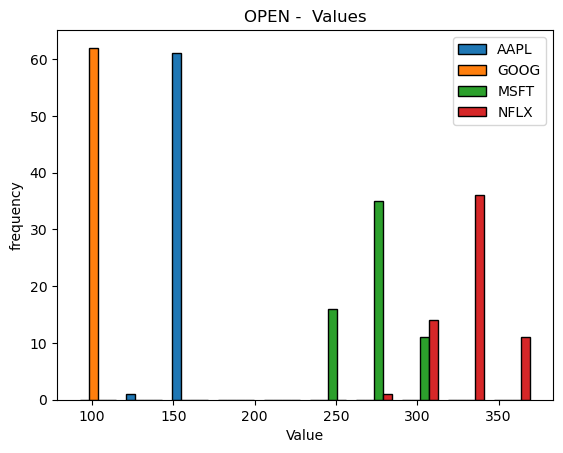

In [5]:
open_data =  stocks.pivot(index='Date', columns='Ticker', values='Open')
plt.hist(open_data.values, bins=10, edgecolor='black', label=open_data.columns)
plt.xlabel("Value")
plt.ylabel("frequency")
plt.title('OPEN -  Values')
plt.legend()
plt.show()

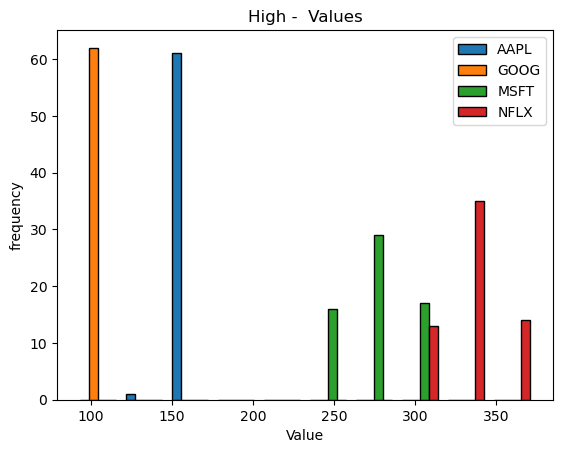

In [6]:
high_data =  stocks.pivot(index='Date', columns='Ticker', values='High')
plt.hist(high_data.values, bins=10, edgecolor='black', label=open_data.columns)
plt.xlabel("Value")
plt.ylabel("frequency")
plt.title('High -  Values')
plt.legend()
plt.show()

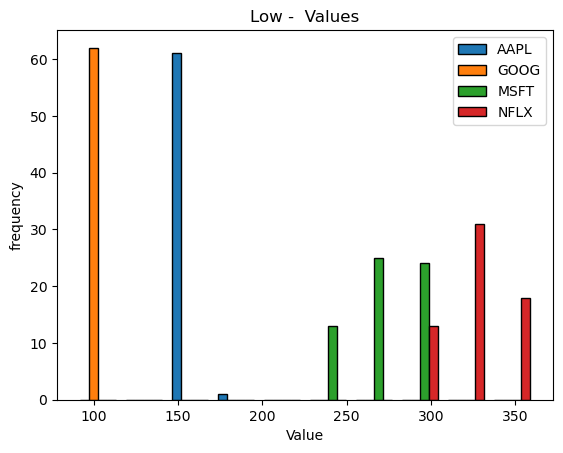

In [7]:
low_data =  stocks.pivot(index='Date', columns='Ticker', values='Low')
plt.hist(low_data.values, bins=10, edgecolor='black', label=open_data.columns)
plt.xlabel("Value")
plt.ylabel("frequency")
plt.title('Low -  Values')
plt.legend()
plt.show()

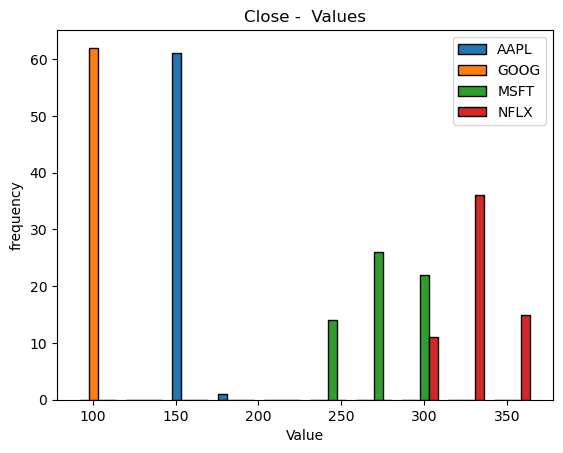

In [8]:
close_data =  stocks.pivot(index='Date', columns='Ticker', values='Close')
plt.hist(close_data.values, bins=10, edgecolor='black', label=open_data.columns)
plt.xlabel("Value")
plt.ylabel("frequency")
plt.title('Close -  Values')
plt.legend()
plt.show()

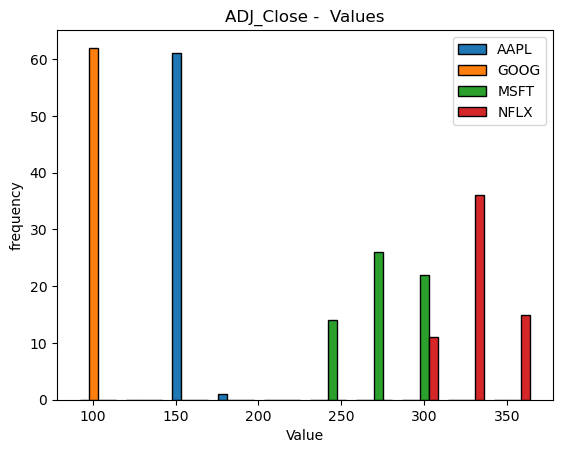

In [9]:
adj_close_data =  stocks.pivot(index='Date', columns='Ticker', values='Adj_Close')
plt.hist(adj_close_data.values, bins=10, edgecolor='black', label=open_data.columns)
plt.xlabel("Value")
plt.ylabel("frequency")
plt.title('ADJ_Close -  Values')
plt.legend()
plt.show()

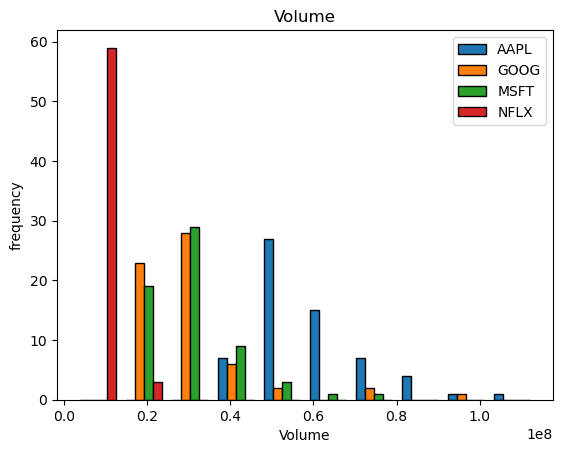

In [10]:
volume_data =  stocks.pivot(index='Date', columns='Ticker', values='Volume')
plt.hist(volume_data.values, bins=10, edgecolor='black', label=open_data.columns)
plt.xlabel("Volume")
plt.ylabel("frequency")
plt.title('Volume')
plt.legend()
plt.show()

 As we can see AAPL AND GOOG act similar across most varriables with a stronger fluxuation souronding MSFT and NFLX.

#### Now lets analyze the variables to discover if any outliers exist within the data. 

In [11]:
# columns we need to check 
columns_check = ["Open", "High", "Low", "Close", "Adj_Close", "Volume"]
threshold = 3
# empty dataframe to store
outliers = pd.DataFrame()
# loop for efficiency
for column in columns_check:
    z_score = (stocks[column] - stocks[column].mean()) / stocks[column].std()
    column_outlier =stocks[z_score.abs() > threshold]
    # add to dataframe
    column_outlier['Column'] = column
    #outliers = outliers.append(column_outlier)
    outliers = pd.concat([outliers, column_outlier])

pd.set_option('display.width',1000)
print("Outliers:")
print(outliers)
    


Outliers:
   Ticker        Date        Open        High         Low       Close   Adj_Close     Volume  Column
61   AAPL  2023-05-05  170.979996  174.300003  170.759995  173.570007  173.570007  113316400  Volume


C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\2427950281.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outlier['Column'] = column


 We have identified an outlier that is specific to only one ticker. Based on this observation, it is reasonable to assume that the data points for this particular data set are relatively consistent and fall within a narrow range, showing no significant deviations from the norm.

# Descriptive Stats 
Required

Taking the mean, median, mode, spread and tails of stock data can provide insights into different aspects of the data distribution and help in understanding various characteristics of the stock market. By calculating and analyzing these measures (mean, median, and mode), you can gain insights into the central tendency, overall distribution, and recurring patterns in stock data.
The mean (average) is calculated by summing up all the values in a dataset and dividing by the total number of observations. When applied to stock data, the mean can provide an indication of the central tendency or typical value of the dataset. It can help answer questions like, "On average, how has the stock performed. The median represents the middle value in a sorted dataset. It is the value that separates the dataset into two equal halves, with 50% of the data points falling below it and 50% above it. The median is often used as a measure of central tendency when dealing with skewed distributions or datasets with outliers.  The mode represents the most frequently occurring value in a dataset. In the context of stock data, the mode can help identify common or recurring patterns or price levels. For example, if a stock frequently closes around a particular price, that price could be considered a mode. The spread in stock data refers to the range of price values observed during a specific period. It indicates the extent of price fluctuations or variability within that period. Lastly analyzing the tails can help identify unusual market conditions, market shocks, or specific events that have a significant impact on stock prices. For example, fat tails (more extreme events than expected) may indicate periods of heightened market volatility or unexpected news affecting stock prices. 

### Function to extract mean, median, mode, spread and tails 

In [12]:
def analyze_data(data, columns):
    select_data = data[columns]
    # Calculate mean
    mean = select_data.mean()
    
    # Calculate median
    median = select_data.mean()
    
    # Calculate mode 
    mode = select_data.mode(). values[0]
    
    # Calculate spread
    spread = select_data.std()
    
    # Calculate tails 90% 
    tails = {
        '5th Percentile': select_data.quantile(0.05),
        '95th Percentile': select_data.quantile(0.95)
    }
    return mean, median, mode, spread, tails
    
    
    
    

### Separate each company from the the dateset into company specific dataframes

In [13]:
# Apple 
apple = "AAPL"
apple_df = stocks[stocks['Ticker']==apple]
#print(apple_df)


In [14]:
# Google 
google = "GOOG"
google_df = stocks[stocks['Ticker']==google] 
#print(google_df)                          


In [15]:
# Microsoft
microsoft = 'MSFT'
microsoft_df = stocks[stocks['Ticker']==microsoft]
#print(microsoft_df)

In [16]:
# Netflix
netflix = 'NFLX'
netflix_df = stocks[stocks['Ticker']==netflix]
#print(netflix_df)

### Show the stats 

In [17]:
# Company: Apple
columns_analyze = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'] # columns to analyze  
mean, median, mode, spread, tails = analyze_data(apple_df, columns_analyze) # calling my function 
# Print the results
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Spread:', spread)
print('Tails:', tails)

Mean: Open         1.577798e+02
High         1.594737e+02
Low          1.566706e+02
Close        1.582406e+02
Adj_Close    1.582294e+02
Volume       6.028296e+07
dtype: float64
Median: Open         1.577798e+02
High         1.594737e+02
Low          1.566706e+02
Close        1.582406e+02
Adj_Close    1.582294e+02
Volume       6.028296e+07
dtype: float64
Mode: [1.65190002e+02 1.46710007e+02 1.43899994e+02 1.63759995e+02
 1.63759995e+02 4.15162000e+07]
Spread: Open         7.224608e+00
High         7.167176e+00
Low          7.345529e+00
Close        7.360485e+00
Adj_Close    7.369573e+00
Volume       1.430605e+07
dtype: float64
Tails: {'5th Percentile': Open         1.471400e+02
High         1.490845e+02
Low          1.468465e+02
Close        1.474355e+02
Adj_Close    1.474355e+02
Volume       4.539554e+07
Name: 0.05, dtype: float64, '95th Percentile': Open         1.692405e+02
High         1.703250e+02
Low          1.675210e+02
Close        1.685335e+02
Adj_Close    1.685335e+02
Volume 

In [18]:
# Company: Google 
columns_analyze = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'] # columns to analyze  
mean, median, mode, spread, tails = analyze_data(google_df, columns_analyze) # calling my function 
# Print the results
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Spread:', spread)
print('Tails:', tails)

Mean: Open         1.003819e+02
High         1.017925e+02
Low          9.926287e+01
Close        1.006315e+02
Adj_Close    1.006315e+02
Volume       3.072537e+07
dtype: float64
Median: Open         1.003819e+02
High         1.017925e+02
Low          9.926287e+01
Close        1.006315e+02
Adj_Close    1.006315e+02
Volume       3.072537e+07
dtype: float64
Mode: [1.05320000e+02 9.01299973e+01 8.88600006e+01 1.05120003e+02
 1.05120003e+02 1.67320000e+07]
Spread: Open         6.197598e+00
High         6.229136e+00
Low          6.104003e+00
Close        6.279464e+00
Adj_Close    6.279464e+00
Volume       1.422509e+07
dtype: float64
Tails: {'5th Percentile': Open         9.009350e+01
High         9.148400e+01
Low          8.977400e+01
Close        9.053500e+01
Adj_Close    9.053500e+01
Volume       1.877231e+07
Name: 0.05, dtype: float64, '95th Percentile': Open         1.076465e+02
High         1.086795e+02
Low          1.060190e+02
Close        1.082185e+02
Adj_Close    1.082185e+02
Volume 

In [19]:
# Company: Microsoft 
columns_analyze = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'] # columns to analyze  
mean, median, mode, spread, tails = analyze_data(microsoft_df, columns_analyze) # calling my function 
# Print the results
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Spread:', spread)
print('Tails:', tails)

Mean: Open         2.747360e+02
High         2.777644e+02
Low          2.720277e+02
Close        2.750398e+02
Adj_Close    2.749752e+02
Volume       3.084835e+07
dtype: float64
Median: Open         2.747360e+02
High         2.777644e+02
Low          2.720277e+02
Close        2.750398e+02
Adj_Close    2.749752e+02
Volume       3.084835e+07
dtype: float64
Mode: [2.46550003e+02 2.50929993e+02 2.45610001e+02 3.05410004e+02
 3.05410004e+02 1.71503000e+07]
Spread: Open         1.732481e+01
High         1.743544e+01
Low          1.736039e+01
Close        1.767623e+01
Adj_Close    1.770551e+01
Volume       1.109188e+07
dtype: float64
Tails: {'5th Percentile': Open         2.500000e+02
High         2.515550e+02
Low          2.476250e+02
Close        2.494570e+02
Adj_Close    2.494570e+02
Volume       2.099800e+07
Name: 0.05, dtype: float64, '95th Percentile': Open         3.062140e+02
High         3.086095e+02
Low          3.038845e+02
Close        3.054100e+02
Adj_Close    3.054100e+02
Volume 

In [20]:
# Company: Netflix
columns_analyze = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'] # columns to analyze  
mean, median, mode, spread, tails = analyze_data(netflix_df, columns_analyze) # calling my function 
# Print the results
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Spread:', spread)
print('Tails:', tails)

Mean: Open         3.281106e+02
High         3.326481e+02
Low          3.228285e+02
Close        3.276147e+02
Adj_Close    3.276147e+02
Volume       6.471732e+06
dtype: float64
Median: Open         3.281106e+02
High         3.326481e+02
Low          3.228285e+02
Close        3.276147e+02
Adj_Close    3.276147e+02
Volume       6.471732e+06
dtype: float64
Mode: [2.87339996e+02 2.97450012e+02 2.85329987e+02 2.92760010e+02
 2.92760010e+02 2.65790000e+06]
Spread: Open         1.846714e+01
High         1.808606e+01
Low          1.842131e+01
Close        1.855442e+01
Adj_Close    1.855442e+01
Volume       3.416398e+06
dtype: float64
Tails: {'5th Percentile': Open         2.979945e+02
High         3.063170e+02
Low          2.923430e+02
Close        2.950820e+02
Adj_Close    2.950820e+02
Volume       3.686280e+06
Name: 0.05, dtype: float64, '95th Percentile': Open         3.584620e+02
High         3.637065e+02
Low          3.541410e+02
Close        3.613470e+02
Adj_Close    3.613470e+02
Volume 

A Probability Mass Function (PMF) is not typically used directly for stock data, as stock prices are continuous variables and not discrete. PMF is specifically suited for discrete random variables, where you have a finite or countable number of distinct outcomes and can assign probabilities to each outcome. you can however compare two scenarios of the same stock variable using a PMF if you first discretize the continuous data. While a PMF is generally used for discrete data, you can still approximate a PMF for continuous data by discretizing it into bins. we will look at the data for the open variable for each company. 

The PMF provides the probabilities of specific values occurring in the 'Open' variable for each scenario. PMF scenarios helps you understand how the probabilities of different 'Open' prices vary across scenarios. It allows us to identify patterns, differences, and similarities in the data distributions under different conditions. PMFs are useful for exploring discrete data and comparing the likelihood of specific outcomes. PMFs can help in understanding the likelihood of extreme price movements or significant deviations from the mean.PMFs can help compare the distributions of stock prices under each scenario. This comparison can aid in making our decision to find the best company to purchase. 

In [21]:
# lets Discretize the data 
def make_pmf(data, num_bins):
    # data into num_bins
    bins = np.linspace(data.min(), data.max(), num_bins +1)
    discrete_data = np.digitize(data, bins)
    
    # probabilitities calculation for each bin
    pmf = np.histogram(discrete_data, bins=np.arange(1, num_bins + 2),  density=True)[0]
    return pmf 

In [22]:
# set bins
num_bins = 20 

### Apple

In [23]:
# Create random scenario labels for each data point (For demonstration )
np.random.seed(42)  # Set a seed for reproducibility
num_data_points = len(apple_df)
scenarios = np.random.choice(['Scenario 1', 'Scenario 2'], size=num_data_points)

# Add the 'Scenario' column to the DataFrame
apple_df['Scenario'] = scenarios

# Get unique scenarios
unique_scenarios = apple_df['Scenario'].unique()

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\382765030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df['Scenario'] = scenarios


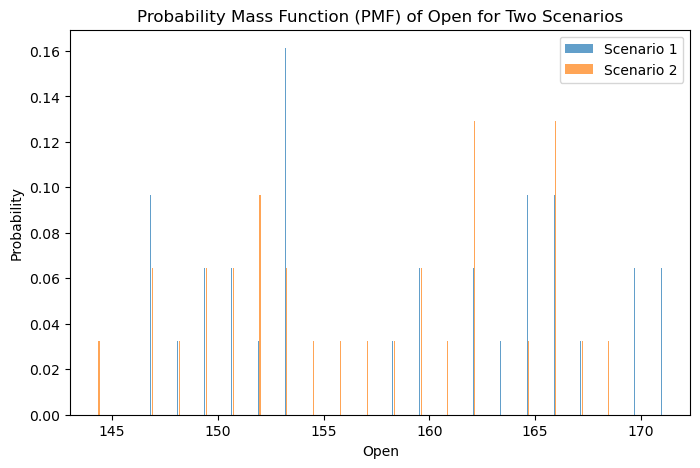

In [24]:
# create pmf for open column for both scenarios 
plt.figure(figsize=(8,5))
for scenario in apple_df['Scenario'].unique():
    data_scenario = apple_df[apple_df['Scenario'] == scenario]['Open']
    pmf = make_pmf(data_scenario, num_bins)
    bin_centers = np.linspace(data_scenario.min(), data_scenario.max(), num_bins)
    plt.bar(bin_centers, pmf, width=0.05, alpha=0.7, linewidth=2, label=scenario)
    
    
plt.xlabel('Open')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Open for Two Scenarios')
plt.legend()
plt.show()

### Google 

In [25]:
# Create random scenario labels for each data point (For demonstration )
np.random.seed(125)  # Set a seed for reproducibility
num_data_points = len(google_df)
scenarios = np.random.choice(['Scenario 1', 'Scenario 2'], size=num_data_points)

# Add the 'Scenario' column to the DataFrame
google_df['Scenario'] = scenarios

# Get unique scenarios
unique_scenarios = google_df['Scenario'].unique()

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\1465660852.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df['Scenario'] = scenarios


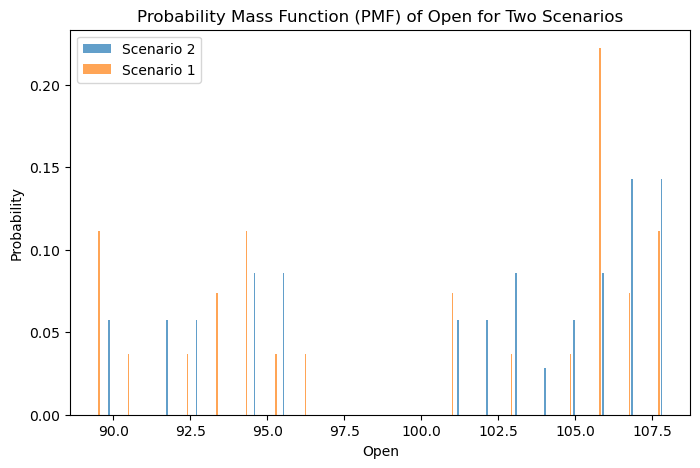

In [26]:
plt.figure(figsize=(8,5))
for scenario in google_df['Scenario'].unique():
    data_scenario =  google_df[ google_df['Scenario'] == scenario]['Open']
    pmf = make_pmf(data_scenario, num_bins)
    bin_centers = np.linspace(data_scenario.min(), data_scenario.max(), num_bins)
    plt.bar(bin_centers, pmf, width=0.05, alpha=0.7, linewidth=2, label=scenario)
    
    
plt.xlabel('Open')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Open for Two Scenarios')
plt.legend()
plt.show()

### Microsoft 

In [27]:
# Create random scenario labels for each data point (For demonstration )
np.random.seed(125)  # Set a seed for reproducibility
num_data_points = len(microsoft_df)
scenarios = np.random.choice(['Scenario 1', 'Scenario 2'], size=num_data_points)

# Add the 'Scenario' column to the DataFrame
microsoft_df['Scenario'] = scenarios

# Get unique scenarios
unique_scenarios = microsoft_df['Scenario'].unique()

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\2935754813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft_df['Scenario'] = scenarios


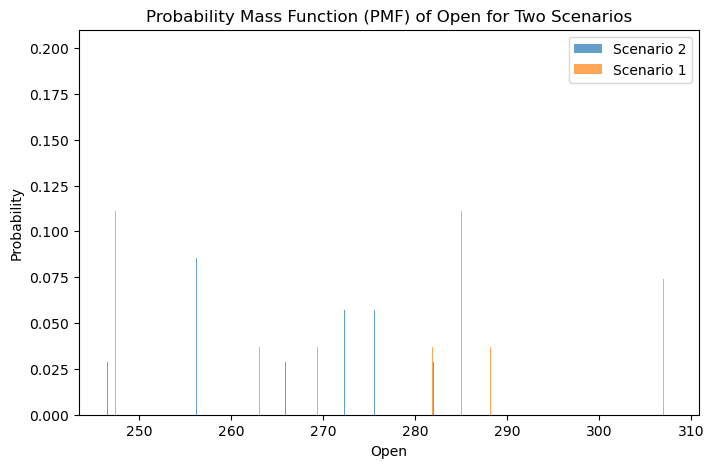

In [28]:
plt.figure(figsize=(8,5))
for scenario in microsoft_df['Scenario'].unique():
    data_scenario = microsoft_df[microsoft_df['Scenario'] == scenario]['Open']
    pmf = make_pmf(data_scenario, num_bins)
    bin_centers = np.linspace(data_scenario.min(), data_scenario.max(), num_bins)
    plt.bar(bin_centers, pmf, width=0.05, alpha=0.7, linewidth=2, label=scenario)
    
    
plt.xlabel('Open')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Open for Two Scenarios')
plt.legend()
plt.show()

### Netflix 

In [29]:
# Create random scenario labels for each data point (For demonstration )
np.random.seed(125)  # Set a seed for reproducibility
num_data_points = len(netflix_df)
scenarios = np.random.choice(['Scenario 1', 'Scenario 2'], size=num_data_points)

# Add the 'Scenario' column to the DataFrame
netflix_df['Scenario'] = scenarios

# Get unique scenarios
unique_scenarios = netflix_df['Scenario'].unique()

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\801476570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Scenario'] = scenarios


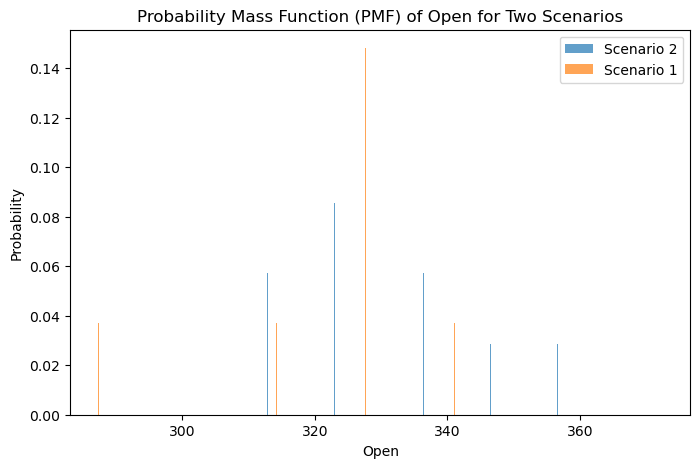

In [30]:
plt.figure(figsize=(8,5))
for scenario in netflix_df['Scenario'].unique():
    data_scenario = netflix_df[netflix_df['Scenario'] == scenario]['Open']
    pmf = make_pmf(data_scenario, num_bins)
    bin_centers = np.linspace(data_scenario.min(), data_scenario.max(), num_bins)
    plt.bar(bin_centers, pmf, width=0.05, alpha=0.7, linewidth=2, label=scenario)
    
    
plt.xlabel('Open')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Open for Two Scenarios')
plt.legend()
plt.show()

# CDF
Required 

 Cumulative Distribution Function (CDFs) play a significant role in financial analysis and decision-making related to stocks and other financial assets. They provide valuable insights into the probability distribution of stock prices, enabling investors and analysts to make informed decisions and manage risks effectively. Lets perform a CDF on the trading volume of our four stock choices. When seeking to pick a better stock, analyzing the Cumulative Distribution Function (CDF) of trading volume can offer critical insights. The CDF provides a comprehensive view of the distribution of trading activity and liquidity for a particular stock. Stocks with steeper CDFs indicate higher trading activity and liquidity, presenting better opportunities for buying or selling shares without significantly impacting the price. Moreover, these stocks often exhibit more substantial price stability due to their higher number of buyers and sellers. By comparing the CDFs of multiple stocks, one can distinguish between those with active trading and those with lower activity, enabling investors to align their strategies with their desired level of market involvement. Day traders can leverage intraday CDF analysis to identify peak trading windows for optimal trading opportunities. In conclusion, incorporating CDF analysis into the stock selection process empowers investors to make well-informed decisions based on trading volume, liquidity, and market dynamics, ultimately leading to a more effective and rewarding investment strategy.

After conducting a thorough analysis of the Cumulative Distribution Functions (CDFs) for Netflix, Microsoft, Google, and Apple, it becomes evident that Google and Netflix exhibit poorer fits compared to Apple and Microsoft. The CDFs of Apple and Microsoft indicate strong probabilities and suggest higher trading activity and liquidity desirability. In particular, Microsoft stands out with a significantly stronger trading volume, making it a more appealing choice for investors seeking higher liquidity. On the other hand, Google and Netflix show relatively weaker probabilities, implying lower liquidity and potentially limited opportunities for seamless buying and selling of shares. Based on this assessment, investors may find Apple and Microsoft more attractive for their investment strategies, considering their strong CDFs and higher liquidity prospects.

### Apple

In [31]:
volume_data_aapl = apple_df['Volume'].values # sorting volume as numpy array 
sorted_volume_1 = np.sort(volume_data_aapl) # ascending order


In [32]:
# calculating the CDF 
cdf_aapl = np.arange(1, len(sorted_volume_1) + 1) / len(sorted_volume_1)

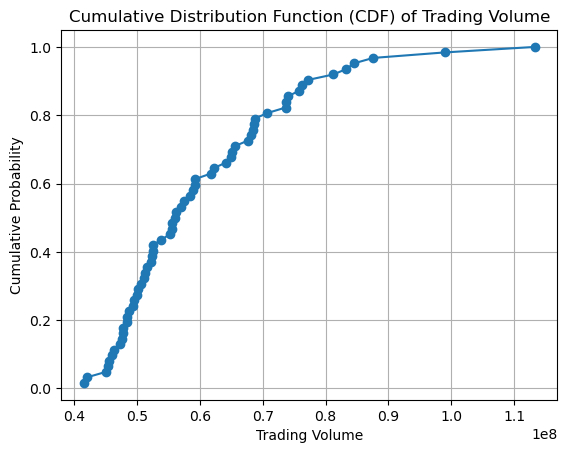

In [33]:
# Plot the CDF
plt.plot(sorted_volume_1, cdf_aapl, marker='o')
plt.xlabel('Trading Volume')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Trading Volume')
plt.grid(True)
plt.show()

### Netflix

In [34]:
volume_data_nflx = netflix_df['Volume'].values # sorting volume as numpy array 
sorted_volume_2 = np.sort(volume_data_nflx) # ascending order

In [35]:
cdf_nflx = np.arange(1, len(sorted_volume_2) + 1) / len(sorted_volume_2)

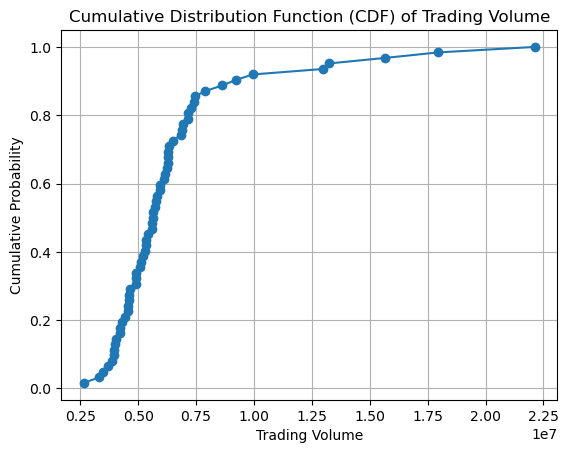

In [36]:
# Plot the CDF
plt.plot(sorted_volume_2, cdf_nflx, marker='o')
plt.xlabel('Trading Volume')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Trading Volume')
plt.grid(True)
plt.show()

### Google 

In [37]:
volume_data_goog = google_df['Volume'].values # sorting volume as numpy array 
sorted_volume_3 = np.sort(volume_data_goog) # ascending order

In [38]:
cdf_goog = np.arange(1, len(sorted_volume_3) + 1) / len(sorted_volume_3)

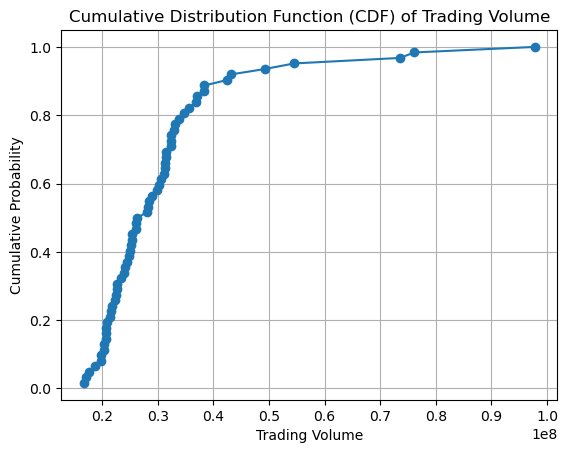

In [39]:
# Plot the CDF
plt.plot(sorted_volume_3, cdf_goog, marker='o')
plt.xlabel('Trading Volume')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Trading Volume')
plt.grid(True)
plt.show()

### Microsoft 

In [40]:
volume_data_msft = microsoft_df['Volume'].values # sorting volume as numpy array 
sorted_volume_4 = np.sort(volume_data_msft) # ascending order

In [41]:
cdf_msft = np.arange(1, len(sorted_volume_4) + 1) / len(sorted_volume_4)

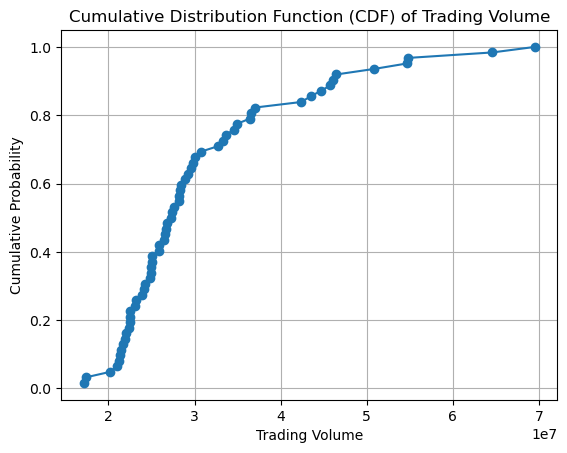

In [42]:
# Plot the CDF
plt.plot(sorted_volume_4, cdf_msft, marker='o')
plt.xlabel('Trading Volume')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Trading Volume')
plt.grid(True)
plt.show()

# Relationships 
 Required 

Understanding the relationships between variables is crucial. While the variables in question are directly linked to the performance of individual stocks, it might appear obvious to identify correlations among these variables. We would naturally expect to observe strong and direct correlations. However, visualizing the correlations can provide valuable insights by reaffirming the expected relationships and uncovering any unexpected connections. This visualization helps to validate our assumptions and potentially reveals surprising associations that may have otherwise gone unnoticed.

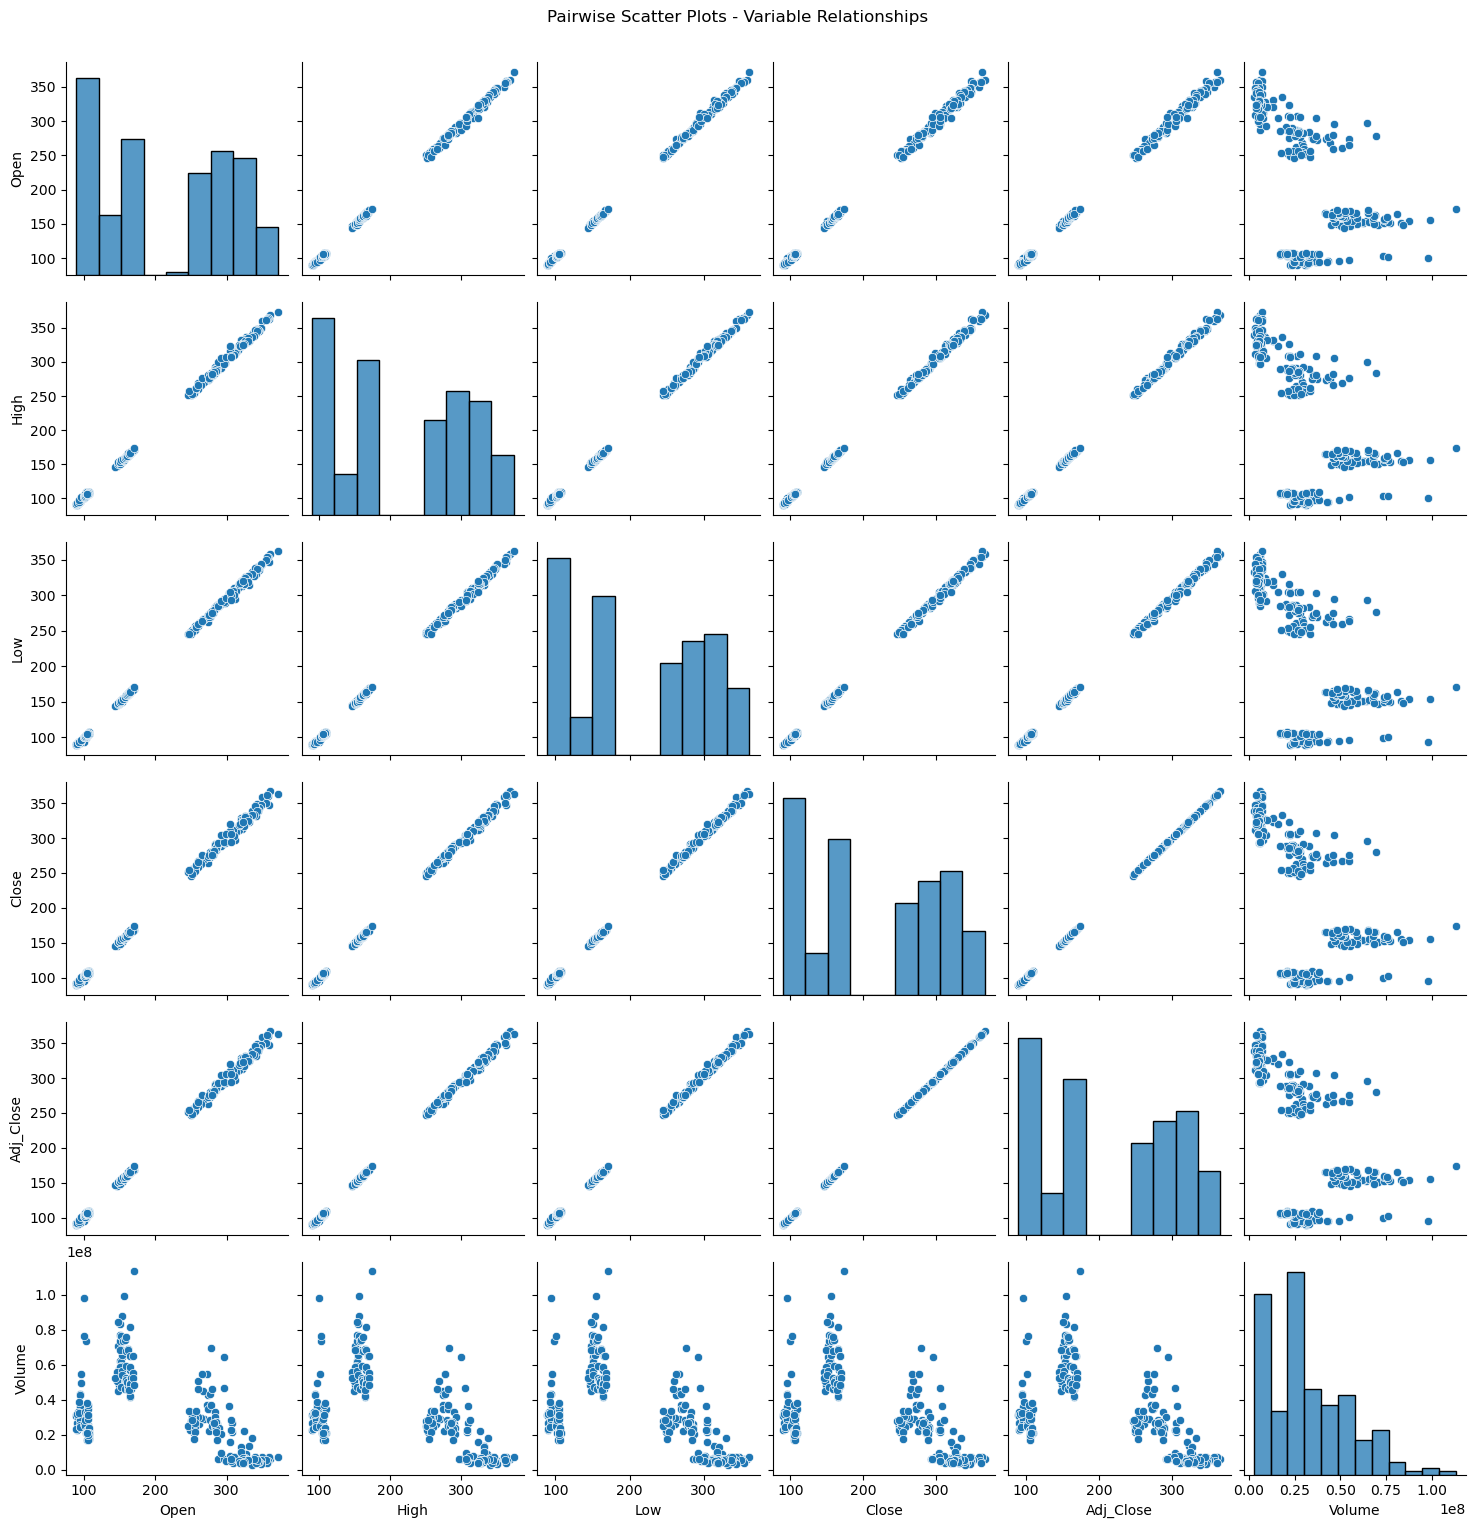

In [44]:
sns.pairplot(stocks)
plt.suptitle('Pairwise Scatter Plots - Variable Relationships', y=1.02)
plt.show()

The observed correlations between the variables serve to reaffirm our initial expectations.

Now, let's examine the correlations between each corporation over time based on the adjusted closing prices. This technique will enable us to identify companies that exhibit strong relationships with one another. By analyzing the correlations, we can gain insights into how closely the stock prices of different companies move in relation to each other. This analysis will help us understand which corporations share strong positive or negative associations, providing valuable information for various investment or business considerations.

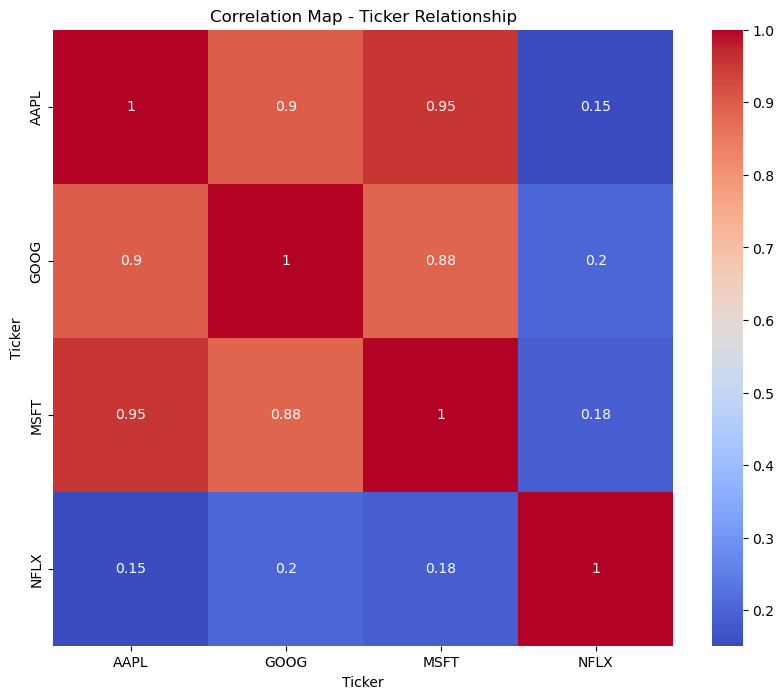

In [45]:
# correlation martix  for based on tickers 
close_data =  stocks.pivot(index='Date', columns='Ticker', values='Adj_Close')
ticker_cor_matrix = close_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(ticker_cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map - Ticker Relationship')
plt.show()

Upon analyzing the data, it becomes evident that the strongest relationship exists between Apple (AAPL) and Microsoft (MSFT). These two companies demonstrate a significant correlation, indicating that their stock prices tend to move in tandem over time.
Interestingly, Netflix (NFLX) stands out as having minimal correlation with the other companies in the dataset. This implies that Netflix's stock price movements are relatively independent and not closely linked to the performance of other corporations in the group.
Conversely, the remaining corporations exhibit strong correlations among themselves, indicating that their stock prices tend to move in sync. This finding suggests a higher level of interconnectedness and shared market influences among these companies. Understanding these relationships can be valuable for investors and market analysts, as it provides insights into which companies' stock prices may be more likely to influence one another and potentially impact investment decisions.




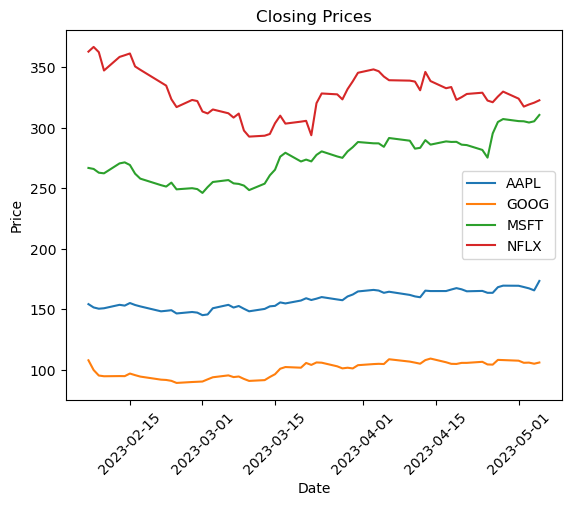

In [47]:
# lets take a look at the closing prices at the given dates 

## close_data =  stocks.pivot(index='Date', columns='Ticker', values='Adj_Close')
tickers= close_data.columns # get list of tickers 

# creating a single plot for all tickers
for ticker in tickers:
    close_prices = close_data[ticker]
    dates = pd.to_datetime(close_prices.index)  # converts to date time format 
    # the plot for closing prices 
    plt.plot(dates, close_prices, label=ticker)




plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Distribution and Hypothesis 
Required 

Individual Stock Analysis: If you are primarily interested in analyzing the price movements or returns of a single stock, you may consider using the log-normal distribution for that particular stock. This is especially relevant when examining the behavior of the stock's prices or returns in isolation. for our instances,  we will use the log distribution to check the stocks for returns and normality. 

After conducting a log distribution analysis on returns for all stocks, we can discern interesting insights. Among the stocks, Google stands out with the most promising potential for robust returns, indicating an optimistic outlook. Conversely, Netflix shows the potential to experience significant value decline, making it a riskier investment.

Although all stocks demonstrate a central frequency around zero, focusing on their potential becomes crucial in our decision-making process when selecting a stock. By considering the range of possible returns, we gain a deeper understanding of each stock's risk and reward profile. This information empowers us to make more informed investment decisions, taking into account both the likelihood of positive returns (for Google) and the possibility of substantial losses (for Netflix

After analyzing the stock data, it is evident that Google shows the potential for the largest returns. However, when we examine the results of the Shapiro-Wilk test, Microsoft stands out with the lowest p-value, indicating strong evidence to reject the null hypothesis. This implies that Microsoft's stock returns are more likely to follow a non-normal distribution, which can lead to greater volatility and unexpected movements in the market.
Therefore, despite Google's promising potential for higher returns, Microsoft's data provides more robust evidence of its actual return behavior. This counterintuitive finding, backed by statistical analysis, suggests that Microsoft's stock returns are more predictable and may align better with certain investment strategies. It emphasizes the importance of considering various factors, including statistical tests, when making investment decisions, as relying solely on potential returns without accounting for underlying distribution patterns may lead to unexpected outcomes. A comprehensive approach, integrating both fundamental analysis and statistical assessments, will offer a more informed basis for selecting the most suitable stock for investment. t.t.) ves.

### Apple

In [48]:
apple_df['Date'] = pd.to_datetime(apple_df['Date']) # convert to datetime
apple_df.set_index('Date', inplace=True) #set as index 

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\1770232723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df['Date'] = pd.to_datetime(apple_df['Date']) # convert to datetime


In [49]:
# daily returns 
apple_df['Daily_Return'] = apple_df['Close'].pct_change()
# Calculate the daily returns from the stock prices. Daily returns are calculated as the percentage change in price from one day to the next.

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\648944322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df['Daily_Return'] = apple_df['Close'].pct_change()


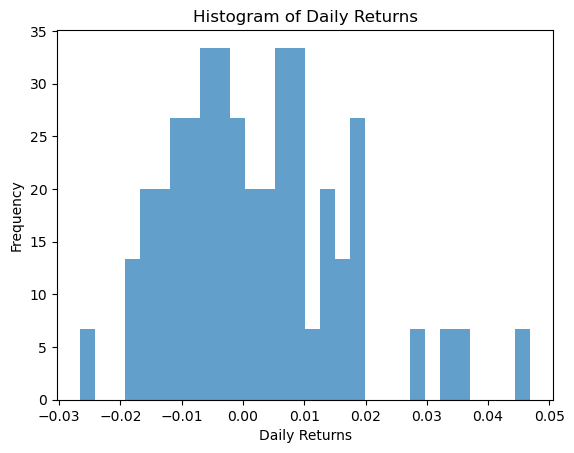

In [50]:
# lets check for log  normality
plt.hist(apple_df['Daily_Return'].dropna(), bins=30, density=True, alpha=0.7)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.show()

# Plot a histogram or a probability density plot (PDF) of the daily returns. Visualize the data to check if it exhibits positive skewness, which is a common characteristic of data that can be modeled using a log-normal distribution.
# we see a slightly right skewed distribution "positive" 

In [51]:
# conduct a log transformation for stability 
apple_df['Log_Returns'] = np.log(1 + apple_df['Daily_Return'])

# Since the daily returns exhibit positive skewness, we are applying a log-transformation to the data. The log-transformation helps to stabilize the variance and make the data more symmetric, making it potentially more amenable to a normal distribution.


C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\3066367049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df['Log_Returns'] = np.log(1 + apple_df['Daily_Return'])


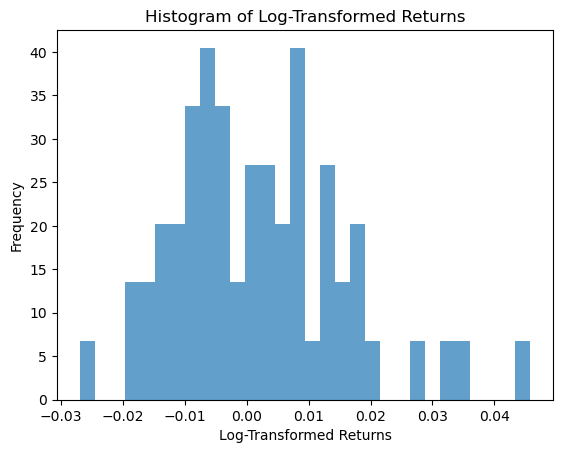

In [52]:
# lets check it again for normality 
plt.hist(apple_df['Log_Returns'].dropna(), bins=30, density=True, alpha=0.7)
plt.xlabel('Log-Transformed Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Returns')
plt.show()

# The data must have not exhibit a departure 

In [53]:
# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = shapiro(apple_df['Log_Returns'].dropna())
print(f"Shapiro-Wilk Test: p-value = {shapiro_pvalue}")

# a p-value of 0.07489887624979019 suggests that the observed data is somewhat consistent with the null hypothesis, but it does not provide strong enough evidence to confidently reject the null 

Shapiro-Wilk Test: p-value = 0.07489887624979019


### Google

In [54]:
google_df['Date'] = pd.to_datetime(google_df['Date']) # convert to datetime
google_df.set_index('Date', inplace=True) #set as index 

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\2869116155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df['Date'] = pd.to_datetime(google_df['Date']) # convert to datetime


In [55]:
# daily returns 
google_df['Daily_Return'] = google_df['Close'].pct_change()
# Calculate the daily returns from the stock prices. Daily returns are calculated as the percentage change in price from one day to the next.

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\3349671500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df['Daily_Return'] = google_df['Close'].pct_change()


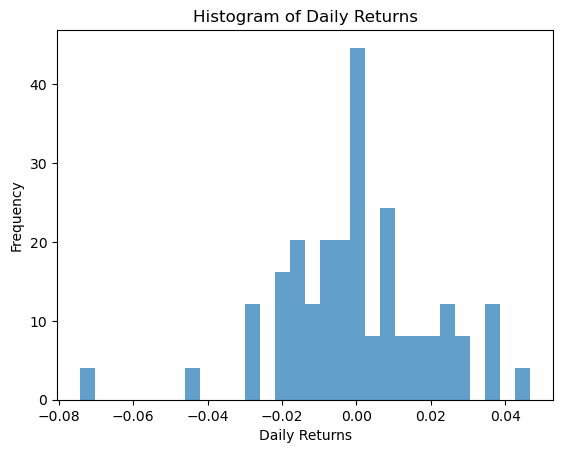

In [56]:
# lets check for log  normality
plt.hist(google_df['Daily_Return'].dropna(), bins=30, density=True, alpha=0.7)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.show()

# Plot a histogram or a probability density plot (PDF) of the daily returns. Visualize the data to check if it exhibits positive skewness, which is a common characteristic of data that can be modeled using a log-normal distribution.
# we see a slightly left skewed distribution "negative" 

In [57]:
# conduct a log transformation for stability 
google_df['Log_Returns'] = np.log(1 + google_df['Daily_Return'])

# Since the daily returns exhibit positive skewness, we are applying a log-transformation to the data. The log-transformation helps to stabilize the variance and make the data more symmetric, making it potentially more amenable to a normal distribution.


C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\4236617783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df['Log_Returns'] = np.log(1 + google_df['Daily_Return'])


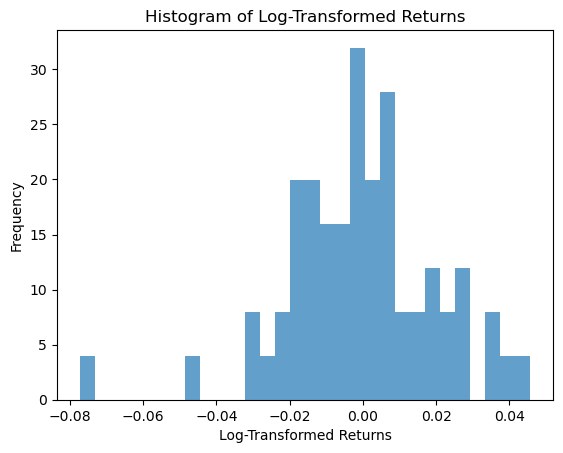

In [58]:
# lets check it again for normality 
plt.hist(google_df['Log_Returns'].dropna(), bins=30, density=True, alpha=0.7)
plt.xlabel('Log-Transformed Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Returns')
plt.show()

# We see an improvement in normality but negative skew 

In [59]:
# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = shapiro(google_df['Log_Returns'].dropna())
print(f"Shapiro-Wilk Test: p-value = {shapiro_pvalue}")

# A p-value of 0.040826354175806046 suggests that the observed data is somewhat consistent with the null hypothesis, but it does not provide strong enough evidence to confidently reject the null much lower p-value than apple  

Shapiro-Wilk Test: p-value = 0.040826354175806046


### Netflix

In [60]:
netflix_df['Date'] = pd.to_datetime(netflix_df['Date']) # convert to datetime
netflix_df.set_index('Date', inplace=True) #set as index 

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\1421605149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Date'] = pd.to_datetime(netflix_df['Date']) # convert to datetime


In [61]:
# daily returns 
netflix_df['Daily_Return'] = netflix_df['Close'].pct_change()
# Calculate the daily returns from the stock prices. Daily returns are calculated as the percentage change in price from one day to the next.

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\11990867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Daily_Return'] = netflix_df['Close'].pct_change()


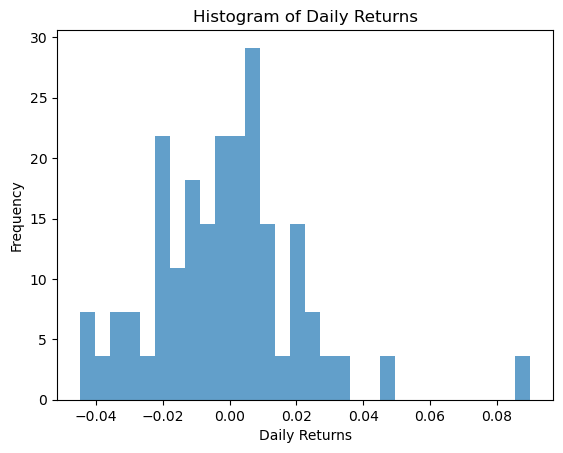

In [62]:
# lets check for log  normality
plt.hist(netflix_df['Daily_Return'].dropna(), bins=30, density=True, alpha=0.7)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.show()

# Plot a histogram or a probability density plot (PDF) of the daily returns. Visualize the data to check if it exhibits positive skewness, which is a common characteristic of data that can be modeled using a log-normal distribution.
# we see a slightly right skewed distribution "positive" 

In [63]:
# conduct a log transformation for stability 
netflix_df['Log_Returns'] = np.log(1 + netflix_df['Daily_Return'])

# Since the daily returns exhibit positive skewness, we are applying a log-transformation to the data. The log-transformation helps to stabilize the variance and make the data more symmetric, making it potentially more amenable to a normal distribution. netflix has the lowest returns 

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\356200809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Log_Returns'] = np.log(1 + netflix_df['Daily_Return'])


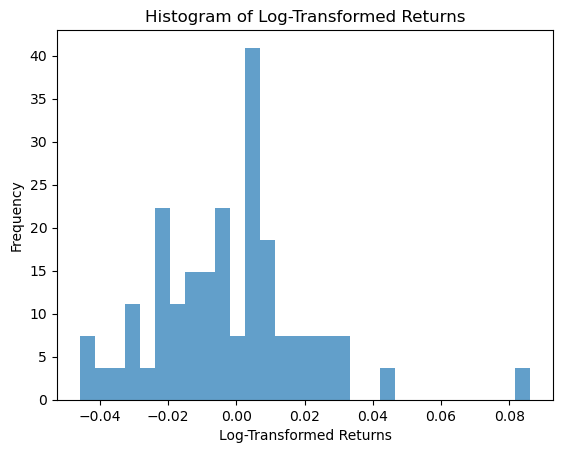

In [64]:
# lets check it again for normality 
plt.hist(netflix_df['Log_Returns'].dropna(), bins=30, density=True, alpha=0.7)
plt.xlabel('Log-Transformed Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Returns')
plt.show()

# We see a  decrease in normality  

In [65]:
# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = shapiro(netflix_df['Log_Returns'].dropna())
print(f"Shapiro-Wilk Test: p-value = {shapiro_pvalue}")

# A p-value of 0.013954018242657185 suggests  it does not provide strong enough evidence to confidently reject the null much lowest p-value   

Shapiro-Wilk Test: p-value = 0.013954018242657185


### Microsoft

In [66]:
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date']) # convert to datetime
microsoft_df.set_index('Date', inplace=True) #set as index 

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\782034133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date']) # convert to datetime


In [67]:
# daily returns 
microsoft_df['Daily_Return'] = microsoft_df['Close'].pct_change()
# Calculate the daily returns from the stock prices. Daily returns are calculated as the percentage change in price from one day to the next.

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\1867041521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft_df['Daily_Return'] = microsoft_df['Close'].pct_change()


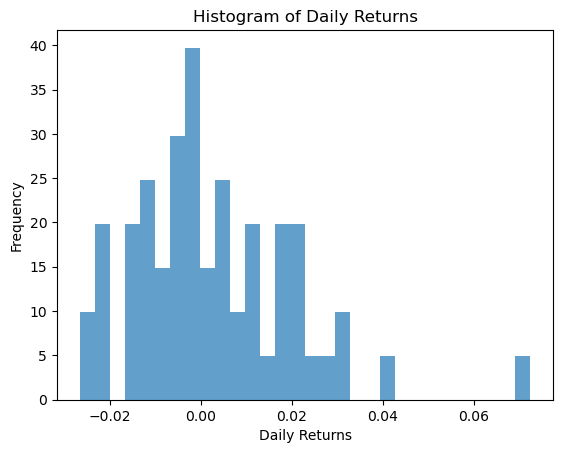

In [68]:
# lets check for log  normality
plt.hist(microsoft_df['Daily_Return'].dropna(), bins=30, density=True, alpha=0.7)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.show()

# Plot a histogram or a probability density plot (PDF) of the daily returns. Visualize the data to check if it exhibits positive skewness, which is a common characteristic of data that can be modeled using a log-normal distribution.
# we see a light left skewed distribution "positive" 

In [69]:
# conduct a log transformation for stability 
microsoft_df['Log_Returns'] = np.log(1 + microsoft_df['Daily_Return'])

# Since the daily returns exhibit positive skewness, we are applying a log-transformation to the data. The log-transformation helps to stabilize the variance and make the data more symmetric, making it potentially more amenable to a normal distribution. netflix has a much lower return 

C:\Users\cantu\AppData\Local\Temp\ipykernel_45352\2942611484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft_df['Log_Returns'] = np.log(1 + microsoft_df['Daily_Return'])


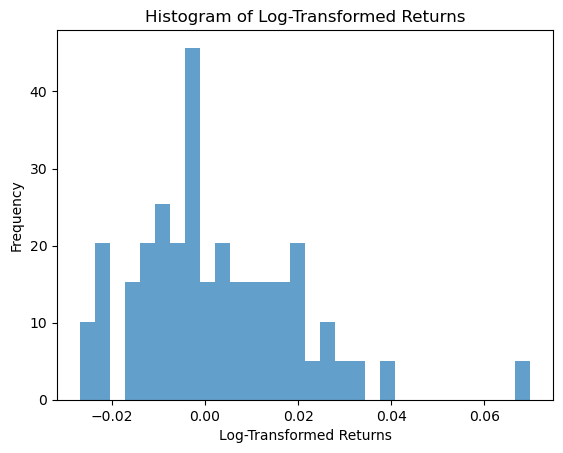

In [70]:
# lets check it again for normality 
plt.hist(microsoft_df['Log_Returns'].dropna(), bins=30, density=True, alpha=0.7)
plt.xlabel('Log-Transformed Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Returns')
plt.show()

# We see a  increase in normality 

In [71]:
# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = shapiro(microsoft_df['Log_Returns'].dropna())
print(f"Shapiro-Wilk Test: p-value = {shapiro_pvalue}")

# A p-value of 0.008855234831571579 suggests  it does provide strong enough evidence to confidently reject the null lowest p-value  most likely to occur. Best choice 

Shapiro-Wilk Test: p-value = 0.008855234831571579


# Regression 
Required

Time series regression, also known as panel data regression or pooled time series analysis, can provide valuable insights into the relationships between the price movements or returns of various stocks over time and other relevant variables. Our intent for this type of regression is predictive modeling, allowing you to forecast future stock prices or returns based on historical data. "High", "Volume", and "Low" will  be considered independent variables, while "Close" will be our dependent variable. 

The model implemented is showing the relationship between the independent variables (Volume, High, Low) and the dependent variable (Close) for each stock over time. The regression model estimates the coefficients for the independent variables (the slopes) that best fit the data and predict the dependent variable (Close ). The model helps us understand how the stock's Close Price is related to its Volume, High, and Low prices over time. It allows us to make predictions for the Close Price based on the values of the independent variables. 

Both Apple and Microsoft exhibit well-fitting regression models, instilling confidence in using historical data to predict future price trends. However, it's worth noting that Google and Netflix have poorly fitting models, introducing significant uncertainty in their future predictions. The weaker fit of these models suggests higher volatility and less reliability when making predictions based on historical data. As investors, it's crucial to consider the potential risks associated with stocks that have less precise regression models, as they may experience more pronounced fluctuations in their stock prices. Ultimately, relying on well-fitting regression models can aid in making more informed and reliable decisions in the stock market. 

In [72]:
# Define the train-test split percentage
stocks['Date'] = pd.to_datetime(stocks['Date'])
train_size = 0.8

In [73]:
# Time series regression and model prediction 
predict_dict = {}

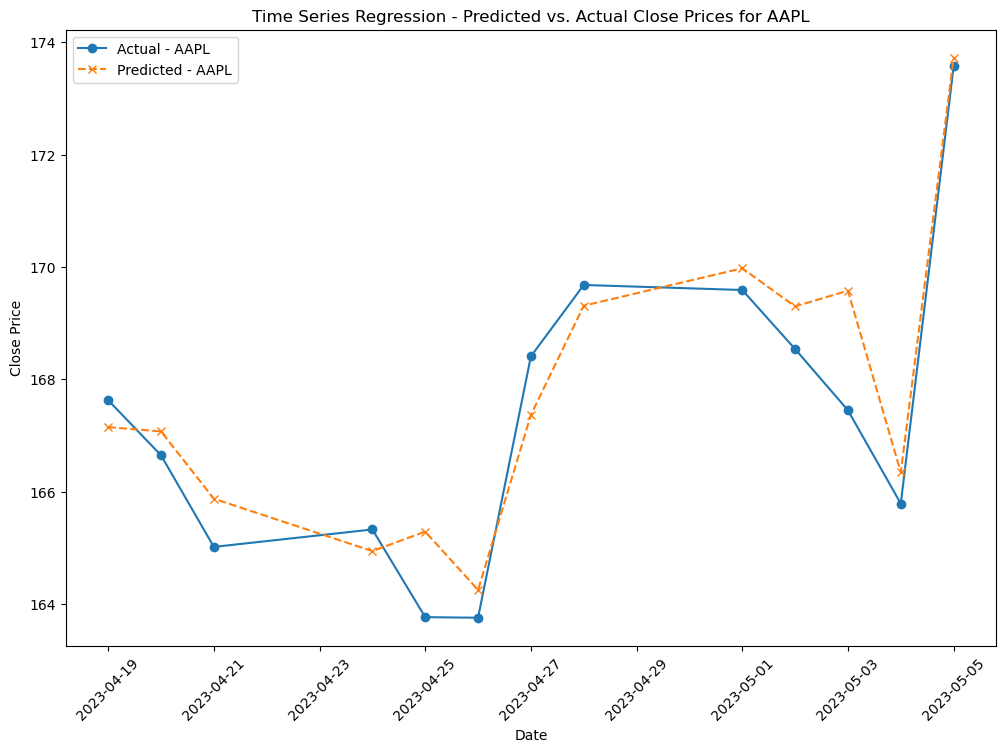

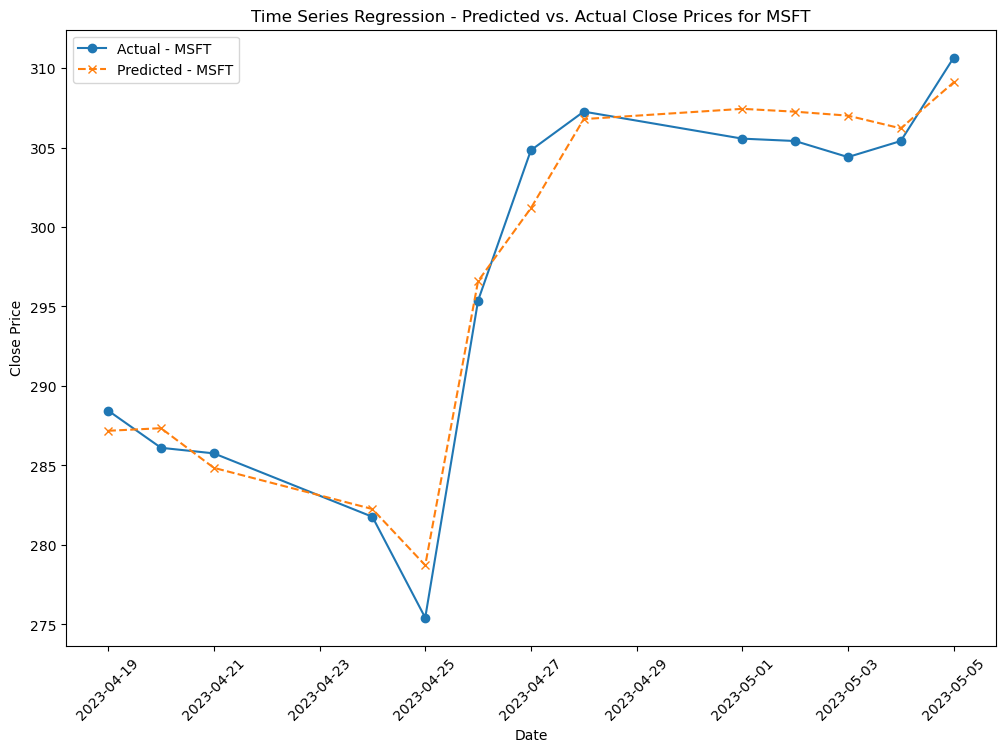

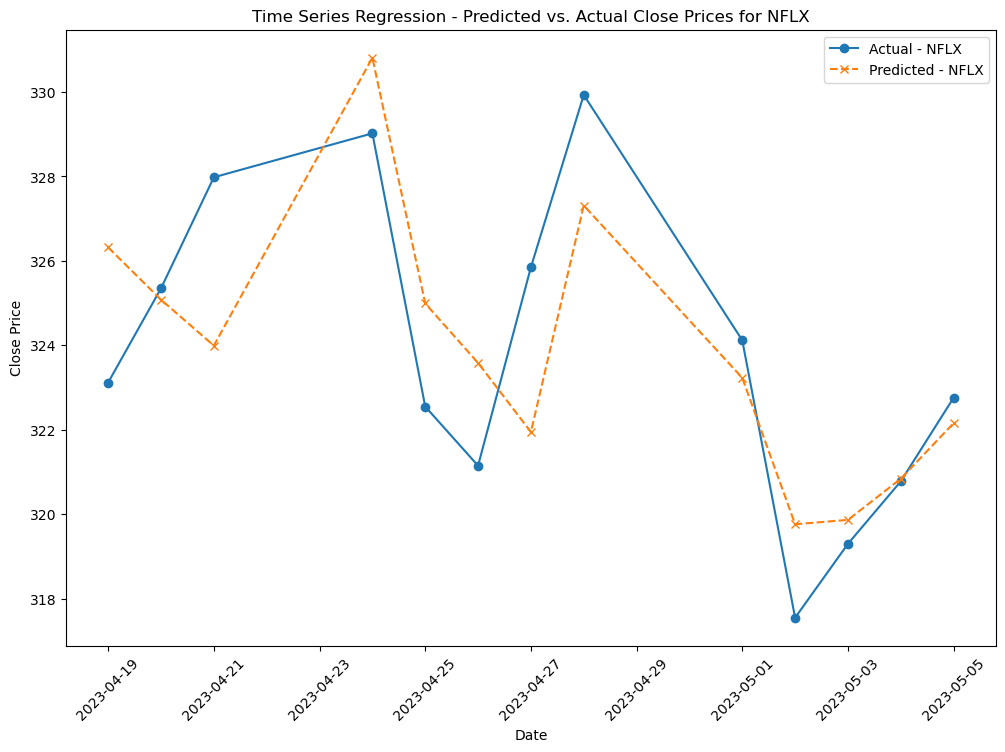

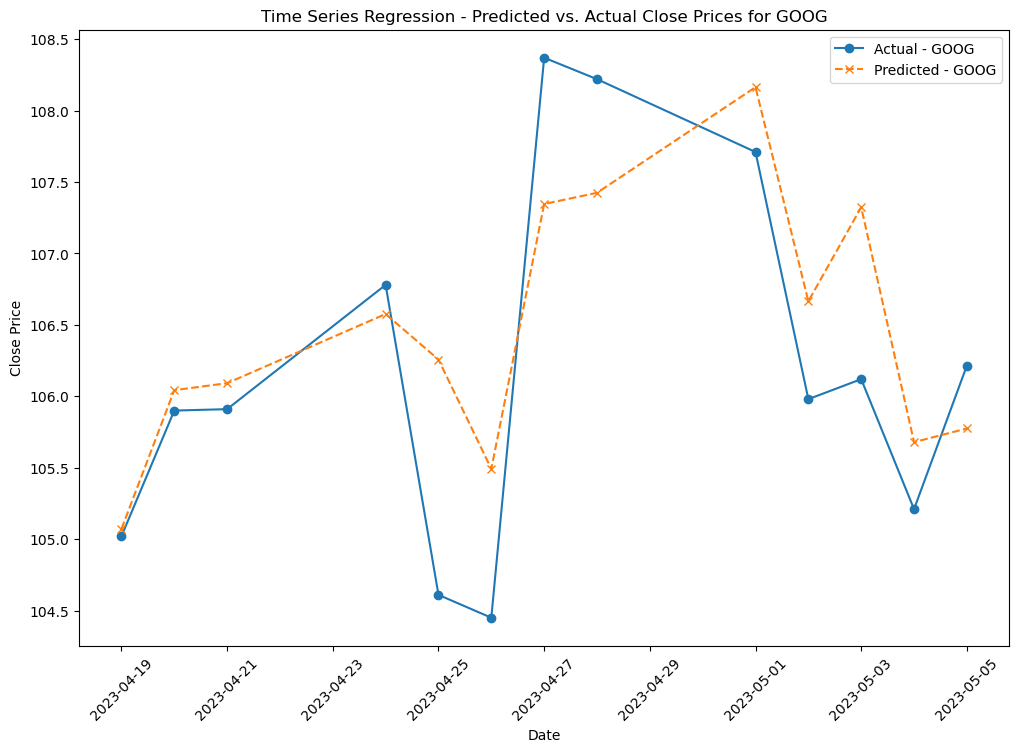

In [74]:
# let's go through each unique stock in the 'Ticker' column

# Loop through each unique stock symbol
for stock_symbol in stocks['Ticker'].unique():
    # Select the data for the current stock symbol
    select_stock = stocks[stocks['Ticker'] == stock_symbol].copy()

    # Sort the data by date (if not already sorted)
    select_stock = select_stock.sort_values(by='Date')

    # Determine the split index for training and testing data
    split_index = int(len(select_stock) * train_size)

    # Check if the stock symbol has enough data points for both training and testing
    if split_index >= 2:
        # Split the data into training and testing sets
        train_data = select_stock.iloc[:split_index]
        test_data = select_stock.iloc[split_index:]

        # Time Series Regression
        x_train = sm.add_constant(train_data[['Volume', 'High', 'Low']]) # Independent variables
        y_train = train_data['Close'] # Dependent variable

        # Fit the regression model
        model = sm.OLS(y_train, x_train).fit()

        # Model Prediction
        x_test = sm.add_constant(test_data[['Volume', 'High', 'Low']])
        predictions = model.predict(x_test)
        predict_dict[stock_symbol] = predictions

        # Visualization
        plt.figure(figsize=(12, 8))
        plt.plot(test_data['Date'], test_data['Close'], label=f'Actual - {stock_symbol}', marker='o')
        plt.plot(test_data['Date'], predictions, label=f'Predicted - {stock_symbol}', linestyle='--', marker='x')

        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.title(f'Time Series Regression - Predicted vs. Actual Close Prices for {stock_symbol}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Not enough data for stock symbol {stock_symbol} for both training and testing sets.")


   



# Summary and Conclusion 
Required

#### Outcome 

After a comprehensive analysis of the data, it can be confidently concluded that Microsoft emerges as the best-performing company overall, showcasing a strong potential for future earnings. Its descriptive statistics provide a robust foundation for evaluating the company's health and trading volume, indicating stability and active market participation.


The cumulative distribution function (CDF) analysis on trading volume reveals that only Apple and Microsoft have good fits to the distribution. However, Microsoft's distribution outperforms Apple, indicating higher liquidity and market activity.

Examining the relationships between various companies, it becomes evident that the strongest correlation exists between Apple (AAPL) and Microsoft (MSFT). This suggests that these two companies' stock prices tend to move in tandem over time, indicating potential similarity in their market performances.

The log-normal distribution analysis provides valuable insights into potential returns, where both Microsoft and Google demonstrate strong cases. While Google showcases the highest potential returns, Microsoft makes a compelling argument for the likelihood of consistent returns.

Regression models play a crucial role in understanding how a stock's Close Price relates to its Volume, High, and Low prices over time, enabling accurate predictions. Only Microsoft and Apple produced well-fitting models, allowing for reliable predictions of their closing prices.

Taking all the exploratory analysis results into account, it is strongly recommended that Microsoft is the best-performing stock and the top choice for investment. The data-driven approach provides substantial evidence supporting this recommendation, assuring potential investors of Microsoft's favorable outlook in the market.

#### What do you feel was missed during the analysis?

My exploratory analysis has certainly provided valuable insights into the data, but I acknowledge that there are additional common industry analysis techniques that could have further supported and enriched my findings. Techniques such as Bollinger Bands, Ichimoku Cloud, and Relative Strength Indices (RSI) are widely used and respected in the financial industry.

Bollinger Bands could have been employed to visualize and analyze the volatility and potential price trends of the stocks. This would have provided a clearer understanding of how the stock prices deviate from their moving averages, offering valuable information for decision-making.

The Ichimoku Cloud, with its comprehensive indicators, could have been utilized to evaluate the overall market trend and momentum. Its cloud-like structure would have provided a holistic perspective on the stocks' performance, taking into account support and resistance levels, and indicating potential buying or selling opportunities.

The Relative Strength Index (RSI) is an effective tool for assessing overbought or oversold conditions in the market. Integrating RSI analysis into the exploration would have provided further clarity on the stocks' potential for reversal or continuation of trends, supporting the overall assessment of their performance.

Incorporating these additional industry-standard techniques into the exploratory analysis would have added depth and a more comprehensive perspective to the findings, enhancing the overall robustness of the conclusions made about the best-performing stock and investment opportunities.

#### Were there any variables you felt could have helped in the analysis?

In this analysis, the primary focus was to utilize readily available and basic stock information accessible to the public. The intention was to provide insights and recommendations based on widely accessible data to make the analysis more inclusive and widely applicable.

However, it is worth mentioning that for a more in-depth and comprehensive understanding of the companies' performance, incorporating variables related to the inner workings of the companies would be beneficial. Variables such as financial statements, corporate governance, management strategies, and industry-specific metrics could provide a deeper insight into their overall health and potential for growth.

As this research solely relied on publicly available stock information, the selected variables were adequate for the exploration and served the purpose of drawing valuable conclusions from the data at hand. While this approach offers a broader perspective and accessibility to a wider audience, delving into more intricate company-specific details would require accessing proprietary information and conducting more extensive research.

#### Were there any assumptions made you felt were incorrect?

During the analysis, I relied on an older dataset to make various assumptions and draw conclusions about the selected companies. In hindsight, utilizing live or real-time data would have provided more accurate and up-to-date insights into the companies' current performance and trends.

Having access to live data for the selected companies would have been beneficial for several reasons. Firstly, real-time data reflects the most recent market conditions, economic factors, and corporate events, allowing for a more accurate representation of the companies' current standing. This up-to-date information would have provided a more precise understanding of their financial health, stock price movements, and potential for future earnings.

Additionally, live data offers the advantage of capturing dynamic market changes, allowing for better identification of short-term trends and potential volatility. This could have led to more informed and timely investment decisions.

However, for the purpose of this assignment, it was imperative to work with a solid dataset that could be easily reproduced and shared if requested. Utilizing live data might have introduced complexities in terms of data availability, consistency, and the potential for variations in results due to real-time market fluctuations.

#### What challenges did you face, what did you not fully understand?

During the assignment, I encountered challenges primarily related to interpreting the results of the functions and distributions used in the analysis. As I am still in the process of building my background and understanding of statistics, some aspects of the methods applied in this analysis were relatively unfamiliar to me.

One of the main challenges was grasping the underlying concepts behind statistical techniques like probability mass functions, cumulative distribution functions, and regression models. While I could implement these methods, fully comprehending their implications and how to interpret the results required more in-depth knowledge and experience.

Furthermore, understanding the significance of certain statistical tests, such as the Shapiro-Wilk test, and their corresponding p-values was another area that presented difficulties. Interpreting the results of these tests in the context of the overall analysis and drawing meaningful conclusions demanded a more thorough understanding of statistical hypothesis testing and its applications.

To overcome these challenges, I intend to further enhance my statistical knowledge by delving into relevant learning resources, seeking guidance from experts, and practicing more data analysis exercises. Gaining a solid foundation in statistics will allow me to confidently interpret the results and apply statistical methods effectively in future analyses.

I acknowledge that the journey of learning statistics can be complex, but I am determined to persist and enhance my skills to become more proficient in data analysis and statistical interpretation. As I continue to build my knowledge and experience, I believe I will become better equipped to handle similar assignments with more confidence and accuracy.